## Exercise solutions

In [1]:
using CSV, DataFrames, Pkg

In [2]:
#Pkg.add("PlotlyJS")
using PlotlyJS

### Exercise 1

Load the `Mmmec`dataset from the `mlmRev` package. You can access it through `RDatasets`.

In [3]:
import RDatasets
melanoma = RDatasets.dataset("mlmRev", "Mmmec")

Row,Nation,Region,County,Deaths,Expected,UVB
,Cat…,Cat…,Cat…,Int32,Float64,Float64
1,Belgium,1,1,79,51.222,-2.9057
2,Belgium,2,2,80,79.956,-3.2075
3,Belgium,2,3,51,46.5169,-2.8038
4,Belgium,2,4,43,55.053,-3.0069
5,Belgium,2,5,89,67.758,-3.0069
6,Belgium,2,6,19,35.976,-3.4175
7,Belgium,3,7,19,13.28,-2.6671
8,Belgium,3,8,15,66.5579,-2.6671
9,Belgium,3,9,33,50.969,-3.1222


Create an interactive histogram depicting the number of deaths due to melanoma in all the European countries. Use 50 bins and the `lightcoral`colour.

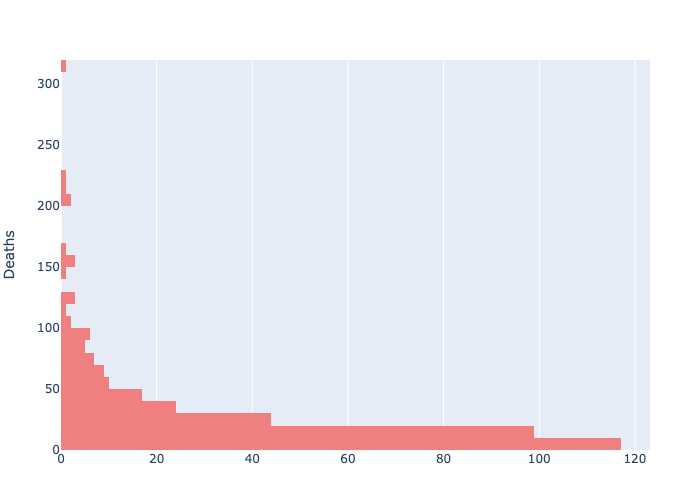

In [4]:
hist = plot(melanoma, :Deaths, kind="histogram", nbinsx=50, marker_color=:lightcoral)

Create a scatter plot between `UVB` and `Deaths`. Colour differently each country. Label the axis appropriately.

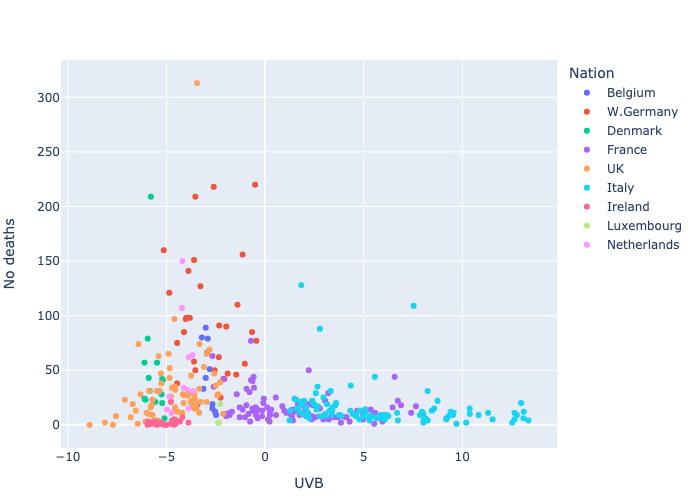

In [5]:
sc = plot(melanoma, x=:UVB, y=:Deaths, mode=:markers, color=:Nation,
        Layout(xaxis_title="UVB", yaxis_title="No deaths"))

Create box plots depicting the number of deaths on each country.

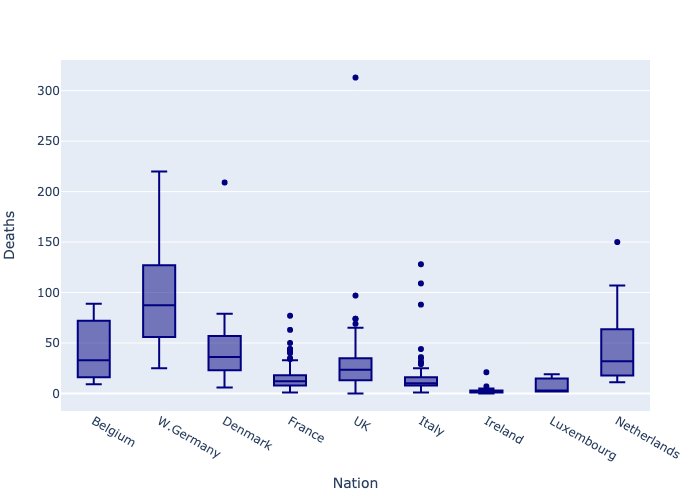

In [6]:
bx = plot(melanoma, x=:Nation, y=:Deaths, kind="box",  marker_color=:navy)

Create violin plots depicting the UVB levels on each country.

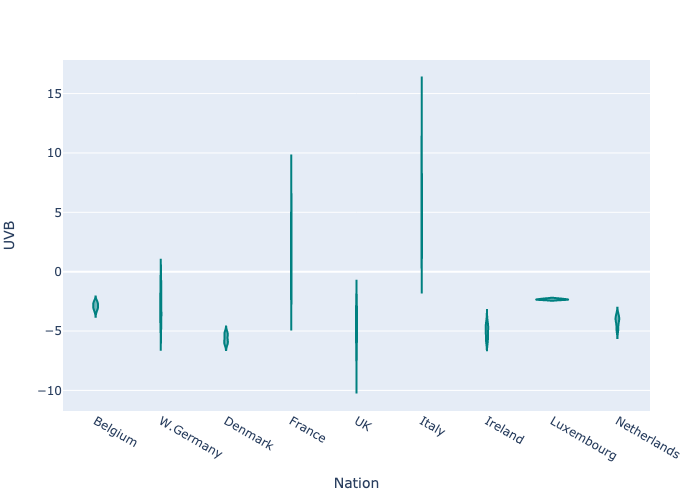

In [7]:
vl = plot(melanoma, x=:Nation, y=:UVB, kind="violin",  marker_color=:teal)

Create a figure that contains a) a histogram depicting standardized UVB. b) a scatter plot between Deaths and Expected. 

In [8]:
using Statistics
melanoma.UVB_std = (melanoma.UVB .- mean(melanoma.UVB))/std(melanoma.UVB)
print(mean(melanoma.UVB_std))
std(melanoma.UVB_std)

5.519752890791739e-17

1.0

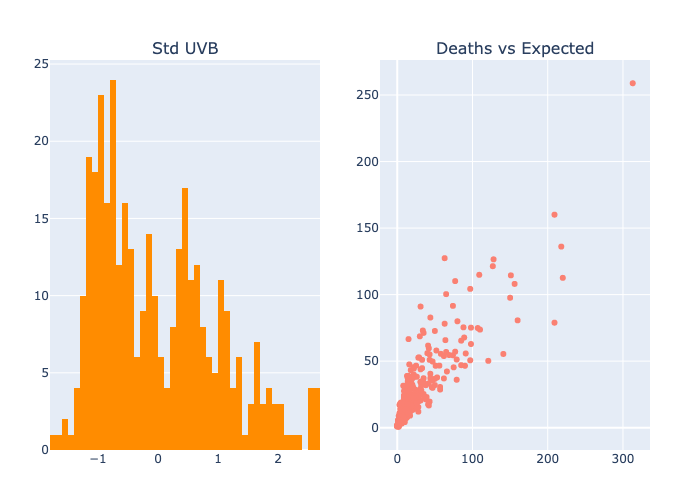

In [9]:
fig = make_subplots(
    rows=1, cols=2,
    column_titles = ["Std UVB", "Deaths vs Expected"],
    specs=[
        Spec(kind="histogram") Spec(kind="scatter")
    ]
)  

add_trace!(
    fig,
    histogram(x=melanoma.UVB_std,
    marker_color=:darkorange,nbinsx=50, showlegend=false),
    row=1,col=1)

add_trace!(
    fig,
    scatter(x=melanoma.Deaths,y=melanoma.Expected,
    mode=:markers,marker_color=:salmon,showlegend=false),
    row=1,col=2)

fig